# Decision Tree Regression

The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve. Предсказание последующего значения на основе предыдущих. 

## Importing the libraries

In [20]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [21]:
import warnings
warnings.filterwarnings('ignore')

## Importing the same dataset on Position salaries

In [22]:
#Importing the Dataset
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values

## Since our dataset is small we don't have to split it into train and test

In [23]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## No need to feature scaling here in this lab

### Import the Descision Tree Regressor from the sklearn.tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

### Create an instance of the imported class and call it 'regressor'. You can try different parameters when making the object. Please, refer to the documentation of the class in order to get more information about the parameters.

In [25]:
regressor = DecisionTreeRegressor(random_state = 0)

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

### Fit your data into the regressor

In [26]:
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

### Make a prediction on a single value (level - 6.5)

In [27]:
y_pred = regressor.predict(6.5)

### Print out the result

In [28]:
regressor.predict(6.5)

array([ 150000.])

### Now you can visualize the result

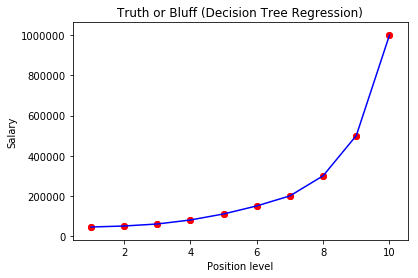

In [29]:
# Visualising the Decision Tree Regression results (higher resolution)
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Have you noticed something wrong with the plot? This is because we use the low scale of representing the data
### Remember that DT takes the average of each {X} clusters outputs. But here, we simply connected each dot continuously, whereas we have to get the average

## You have to increase the scale. Remeber we were making the X_grid with higher resolution scale? Make the same here
### Use numpy for making a list of values starting from minimum(X) and ending maximum(X), let the step be 0.01

In [30]:
X_grid = np.arange(min(X), max(X), 0.01)

## You should be getting an ndarray of shape (900,). In order to proceed, reshape it, so that it becomes an ndarray (900,1)

In [31]:
X_grid = X_grid.reshape((len(X_grid), 1))

## Now plot the results

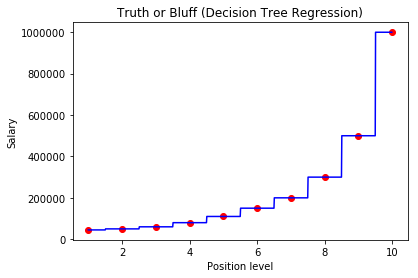

In [32]:
# Visualising the Decision Tree Regression results (higher resolution)
plt.scatter(X, y, color = 'red')   # plot the actual data. For that, fill the blank spaces with your actual data
plt.plot( X_grid,  regressor.predict(X_grid), color = 'blue')    # now make the predictions using regressor and the X_grid you've just created
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### you should get something like this

<img src="final.png">

### the code below can be executed only if you have the pydotplus package and GraphViz tool installed (not the university's PC)

In [3]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
#почему-то он не видит pydotplus, хотя я его устанавливала 
dot_data = StringIO()

export_graphviz(regressor, out_file=dot_data, max_depth=5,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

### your graph structure

<img src="graph.png">